# [Spotify Song & Genre Analysis - 23]


Bilal Eren

## Introduction

<font color="blue">
Spotify data set includes main data which contains more than 175.000 songs collected from Spotify Web API, and also data set grouped by artist, year, or genre. 

There are some track features.


Primary:
- id (Id of track generated by Spotify)
Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)


Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)


### Utilized Datasets

<font color="blue">
There is no additional dataset
</font>

# Installing Libraries

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import seaborn as sns
import plotly.express as px
import plotly.graph_objs as pgo
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from collections import Counter

import random
from math import floor

from os.path import join

%matplotlib inline

# Importing data files

In [ ]:
fname = "data.csv"
df = pd.read_csv(join(path_prefix, fname))

fname_byartist = "data_by_artist.csv"
df_artist = pd.read_csv(join(path_prefix, fname_byartist))

fname_byyear = "data_by_year.csv"
df_year = pd.read_csv(join(path_prefix, fname_byyear))

fname_wgenres = "data_w_genres.csv"
df_genre2 = pd.read_csv(join(path_prefix, fname_wgenres))

# Information about main data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [ ]:
df.shape[0]

174389

In [ ]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In this section, we have obtained the column information of the data. We also print the first 5 rows and all columns belonging to these rows with head.

In [ ]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In this section, we used isna because we wanted to see if the data had missing values. As in the output, it was zero, which means False.



In [ ]:
#Change duration from milliseconds to seconds 
df['duration'] = df['duration_ms'].apply(lambda x:round(x/1000))
df.drop('duration_ms',axis=1,inplace=True)

Change duration from milliseconds to seconds


# Information about Genre data

In [ ]:
fname_bygenres = "data_by_genres.csv"
genre_df = pd.read_csv(join(path_prefix, fname_bygenres))

In [ ]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            3232 non-null   object 
 1   acousticness      3232 non-null   float64
 2   danceability      3232 non-null   float64
 3   duration_ms       3232 non-null   float64
 4   energy            3232 non-null   float64
 5   instrumentalness  3232 non-null   float64
 6   liveness          3232 non-null   float64
 7   loudness          3232 non-null   float64
 8   speechiness       3232 non-null   float64
 9   tempo             3232 non-null   float64
 10  valence           3232 non-null   float64
 11  popularity        3232 non-null   float64
 12  key               3232 non-null   int64  
 13  mode              3232 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.6+ KB


The information found in the genre in this section and that we see in the printout are important to us. This information will guide us in analyzing and processing the data. We will base on this information and analysis while doing machine learning in the next steps.

In [ ]:
#Change duration from milliseconds to seconds 
genre_df['duration'] = genre_df['duration_ms'].apply(lambda x:round(x/1000))
genre_df.drop('duration_ms',axis=1,inplace=True)

Change duration from milliseconds to seconds

In [ ]:
genre_df.head()

,genres,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration
0,21st century classical,0.754600,0.284100,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1,353
1,432hz,0.485515,0.312000,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1,1047
2,8-bit,0.028900,0.673000,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1,133
3,[],0.535793,0.546937,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1,250
4,a cappella,0.694276,0.516172,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1,202


## Missing Data

In [ ]:
# Missing Data
genre_df[genre_df['genres']=="[]"]

,genres,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration
3,[],0.535793,0.546937,0.48543,0.278442,0.22097,-11.624754,0.101511,116.06898,0.486361,12.35077,7,1,250


## Removing Missing Data

In [ ]:
genre_df = genre_df[genre_df['genres']!="[]"]

## Number of unique genres

In [ ]:
#Number of genres
print(f"Number of unique genres : {genre_df['genres'].nunique()}")

Number of unique genres : 3231


We updated the number of genres because the missing value was removed.

# Exploratory Data Analysis

<font color="blue">
Create a new section for each task depending on your project and group size. For instance, if you are working on the Spotifty project with a group size of 2-3, then you should have sections titled
</font>

```
- Visualizations Descriptive Statistics
- Visualizations of Aggregated Forms Based on Features
- Analysis of the Most Popular Artists and Songs
- How Songs of Different Genres Change Over Time
```


## Visualizations and Descriptive Statistics

### Measures of Central Tendency

In [ ]:
df.drop(['key','mode','year','explicit'],axis=1).describe().transpose().sort_index()

,count,mean,std,min,25%,50%,75%,max
acousticness,174389.0,0.499228,0.379936,0.0,0.0877,0.517000,0.8950,0.996
danceability,174389.0,0.536758,0.176025,0.0,0.4140,0.548000,0.6690,0.988
duration,174389.0,232.808325,148.395277,5.0,166.0000,206.000000,266.0000,5338.000
energy,174389.0,0.482721,0.272685,0.0,0.2490,0.465000,0.7110,1.000
instrumentalness,174389.0,0.197252,0.334574,0.0,0.0000,0.000524,0.2520,1.000
liveness,174389.0,0.211123,0.180493,0.0,0.0992,0.138000,0.2700,1.000
loudness,174389.0,-11.750865,5.691591,-60.0,-14.9080,-10.836000,-7.4990,3.855
popularity,174389.0,25.693381,21.872740,0.0,1.0000,25.000000,42.0000,100.000
speechiness,174389.0,0.105729,0.182260,0.0,0.0352,0.045500,0.0763,0.971
tempo,174389.0,117.006500,30.254178,0.0,93.9310,115.816000,135.0110,243.507


In this section, we dropped the 'key','mode','year','explicit'. Because we are doing statistical based analysis and this information does not give us any statistical information. At the same time, we can see each feature's means, medians (%50), standar deviations and more from the table. 


### Histograms of features

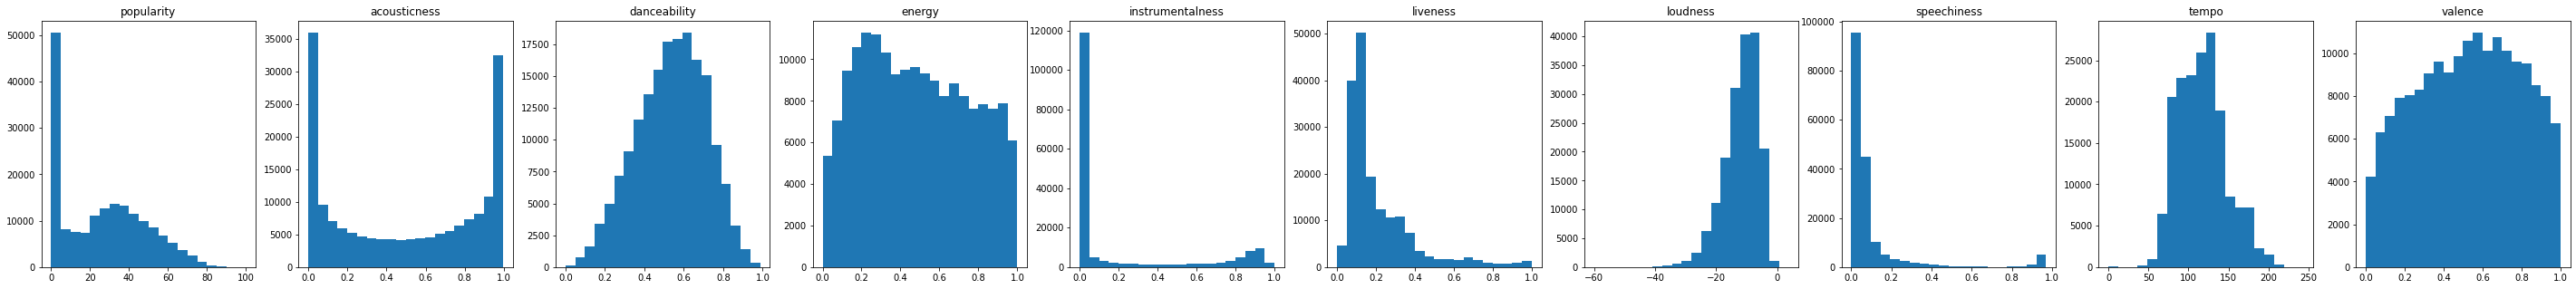

In [ ]:
data = df['popularity'].values
data1 = df['acousticness'].values
data2 = df['danceability'].values
data3 = df['energy'].values
data4 = df['instrumentalness'].values
data5 = df['liveness'].values
data6 = df['loudness'].values
data7 = df['speechiness'].values
data8 = df['tempo'].values
data9 = df['valence'].values

_, axes = plt.subplots(1,10,figsize=(50,5))
axes[0].hist(data, bins=20)
axes[0].set_title(f"popularity")

axes[1].hist(data1, bins=20)
axes[1].set_title(f"acousticness")

axes[2].hist(data2, bins=20)
axes[2].set_title(f"danceability")

axes[3].hist(data3, bins=20)
axes[3].set_title(f"energy")

axes[4].hist(data4, bins=20)
axes[4].set_title(f"instrumentalness")

axes[5].hist(data5, bins=20)
axes[5].set_title(f"liveness")

axes[6].hist(data6, bins=20)
axes[6].set_title(f"loudness")

axes[7].hist(data7, bins=20)
axes[7].set_title(f"speechiness")

axes[8].hist(data8, bins=20)
axes[8].set_title(f"tempo")

axes[9].hist(data9, bins=20)
axes[9].set_title(f"valence")



plt.show()

We have created histograms for each features in this section. In this way, we could see the density or distribution of features. 

Energy and valence distribution's shapes are similar.
Also, instrumentalness and speechines have similar distribution shapes.

### Boxplots of features

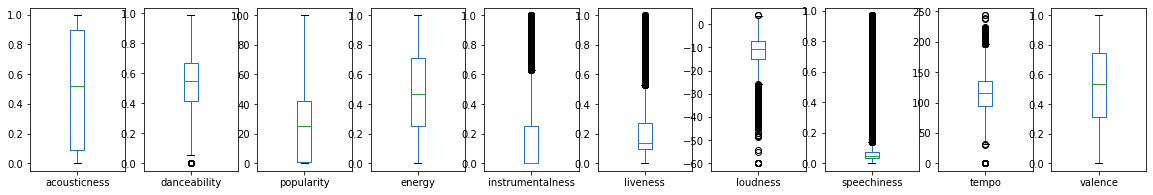

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(20,3))

df["acousticness"].plot(kind="box", ax=ax[0])
df["danceability"].plot(kind="box", ax=ax[1])
df["popularity"].plot(kind="box", ax=ax[2])
df["energy"].plot(kind="box", ax=ax[3])
df["instrumentalness"].plot(kind="box", ax=ax[4])
df["liveness"].plot(kind="box", ax=ax[5])
df["loudness"].plot(kind="box", ax=ax[6])
df["speechiness"].plot(kind="box", ax=ax[7])
df["tempo"].plot(kind="box", ax=ax[8])
df["valence"].plot(kind="box", ax=ax[9])

We plot boxplots to see outliers in the data based on features and its central value and its variability.

#### Outliers removed from features

In [ ]:
def iqr_removal(data):
  """
  removes the outliers from data
  """
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  iqr = q3 - q1
  return data[(data > (q1 - iqr*1.5)) & (data < (q3 + iqr*1.5))]

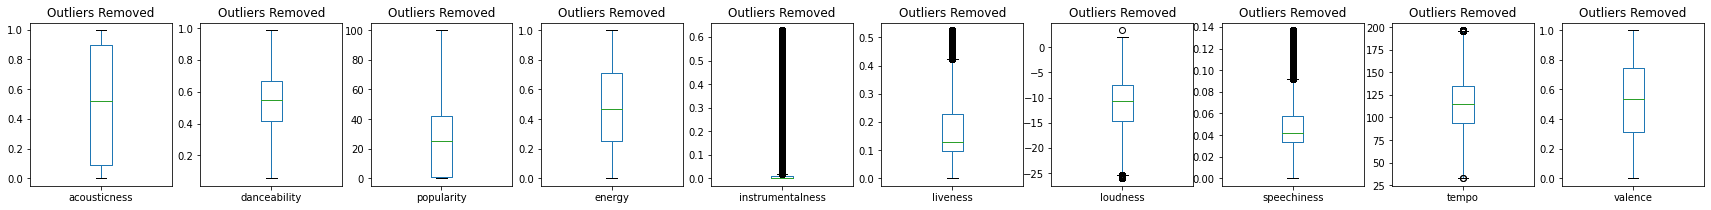

In [ ]:
# create the figure and axes objects
fig, ax = plt.subplots(1, 10, figsize=(30,3))


# remove the outliers
acou_removed = iqr_removal(df["acousticness"])
dance_removed = iqr_removal(df["danceability"])
popu_removed = iqr_removal(df["popularity"])
ener_removed = iqr_removal(df["energy"])
inst_removed = iqr_removal(df["instrumentalness"])
live_removed = iqr_removal(df["liveness"])
loud_removed = iqr_removal(df["loudness"])
spee_removed = iqr_removal(df["speechiness"])
tempo_removed = iqr_removal(df["tempo"])
val_removed = iqr_removal(df["valence"])
# display the outlier removed boxplots


acou_removed.plot(kind="box", ax=ax[0])
dance_removed.plot(kind="box", ax=ax[1])
popu_removed.plot(kind="box", ax=ax[2])
ener_removed.plot(kind="box", ax=ax[3])
inst_removed.plot(kind="box", ax=ax[4])
live_removed.plot(kind="box", ax=ax[5])
loud_removed.plot(kind="box", ax=ax[6])
spee_removed.plot(kind="box", ax=ax[7])
tempo_removed.plot(kind="box", ax=ax[8])
val_removed.plot(kind="box", ax=ax[9])

ax[0].set_title('Outliers Removed');
ax[1].set_title('Outliers Removed');
ax[2].set_title('Outliers Removed');
ax[3].set_title('Outliers Removed');
ax[4].set_title('Outliers Removed');
ax[5].set_title('Outliers Removed');
ax[6].set_title('Outliers Removed');
ax[7].set_title('Outliers Removed');
ax[8].set_title('Outliers Removed');
ax[9].set_title('Outliers Removed');

Then we remove the outliers because of the cleaning.

### Bivariate Analysis

#### Covariance

In [ ]:
df.cov()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration
acousticness,0.144351,-0.017604,-0.077791,-0.019930,0.028214,-0.037466,-0.002034,-1.182075,0.011227,-3.297037,-0.001554,-2.572957,-0.016778,-6.210810,-5.027639
danceability,-0.017604,0.030985,0.009832,0.008908,-0.012697,0.016267,-0.003496,0.250006,-0.003892,0.476440,0.007699,0.029176,0.024986,0.753549,-2.631952
energy,-0.077791,0.009832,0.074357,0.007047,-0.016217,0.034327,0.006635,1.209433,-0.007002,1.961914,-0.005597,2.198159,0.023541,3.968434,2.449027
explicit,-0.019930,0.008908,0.007047,0.063493,-0.011011,0.004682,0.001696,0.152378,-0.007201,0.840747,0.016252,0.061560,-0.000618,1.028013,-1.264069
instrumentalness,0.028214,-0.012697,-0.016217,-0.011011,0.111940,-0.005437,-0.002895,-0.604720,-0.008678,-2.199988,-0.008169,-0.694957,-0.019395,-1.028642,5.144588
key,-0.037466,0.016267,0.034327,0.004682,-0.005437,12.378377,-0.002139,0.505165,-0.204931,0.150147,0.006187,0.533179,0.023813,1.817130,1.052719
liveness,-0.002034,-0.003496,0.006635,0.001696,-0.002895,-0.002139,0.032578,0.064406,0.000138,-0.311720,0.004014,0.046883,-0.000276,-0.057561,0.775314
loudness,-1.182075,0.250006,1.209433,0.152378,-0.604720,0.505165,0.064406,32.394206,-0.050095,41.977526,-0.221479,37.523506,0.455381,71.243193,16.716547
mode,0.011227,-0.003892,-0.007002,-0.007201,-0.008678,-0.204931,0.000138,-0.050095,0.209042,0.076526,-0.003393,0.033722,0.002611,-0.601873,-3.178918
popularity,-3.297037,0.476440,1.961914,0.840747,-2.199988,0.150147,-0.311720,41.977526,0.076526,478.416748,-0.778684,62.855262,0.367170,302.059939,80.216196


#### Correlation

In [ ]:
corrs = df.corr()
corrs

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration
acousticness,1.000000,-0.263217,-0.750852,-0.208176,0.221956,-0.028028,-0.029654,-0.546639,0.064633,-0.396744,-0.022437,-0.223840,-0.166968,-0.607515,-0.089173
danceability,-0.263217,1.000000,0.204838,0.200842,-0.215589,0.026266,-0.110033,0.249541,-0.048358,0.123746,0.239962,0.005479,0.536713,0.159095,-0.100759
energy,-0.750852,0.204838,1.000000,0.102561,-0.177750,0.035780,0.134815,0.779267,-0.056160,0.328939,-0.112616,0.266448,0.326418,0.540850,0.060522
explicit,-0.208176,0.200842,0.102561,1.000000,-0.130609,0.005282,0.037288,0.106249,-0.062503,0.152545,0.353872,0.008075,-0.009275,0.151619,-0.033806
instrumentalness,0.221956,-0.215589,-0.177750,-0.130609,1.000000,-0.004619,-0.047941,-0.317562,-0.056731,-0.300625,-0.133966,-0.068656,-0.219188,-0.114259,0.103619
key,-0.028028,0.026266,0.035780,0.005282,-0.004619,1.000000,-0.003368,0.025227,-0.127397,0.001951,0.009648,0.005009,0.025592,0.019194,0.002016
liveness,-0.029654,-0.110033,0.134815,0.037288,-0.047941,-0.003368,1.000000,0.062695,0.001677,-0.078959,0.122034,0.008586,-0.005781,-0.011852,0.028947
loudness,-0.546639,0.249541,0.779267,0.106249,-0.317562,0.025227,0.062695,1.000000,-0.019250,0.337194,-0.213504,0.217914,0.302520,0.465189,0.019792
mode,0.064633,-0.048358,-0.056160,-0.062503,-0.056731,-0.127397,0.001677,-0.019250,1.000000,0.007652,-0.040711,0.002438,0.021592,-0.048922,-0.046854
popularity,-0.396744,0.123746,0.328939,0.152545,-0.300625,0.001951,-0.078959,0.337194,0.007652,1.000000,-0.195329,0.094985,0.063471,0.513227,0.024714


#### Heat Maps

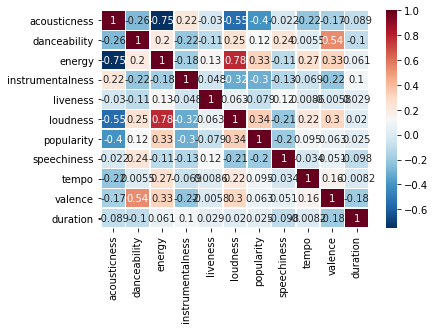

In [ ]:
#Pearson Correlation Table
pearsoncorr = df.drop(['key','mode','year','explicit'],axis=1).corr(method='pearson')
pearsoncorr

sns.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns, cmap='RdBu_r', annot=True, linewidth=0.5)

Values are correlation values between the features.

If correlation value > 0, it is positive correlation and if correlation value < 0, it is negative correlation.

1> correlation value > 0.8, it is strong positive correlation. 

0.8> correlation value > 0.2, it is moderate positive correlation.

0.2 > correlation value > 0, it is weak positive correlation.

-0.8> correlation value > -1, it is strong negative correlation. 

-0.2> correlation value > -0.8, it is moderate negative correlation.

0 > correlation value > -0.2, it is weak negative correlation.

#### Scatter Plots of some of the features

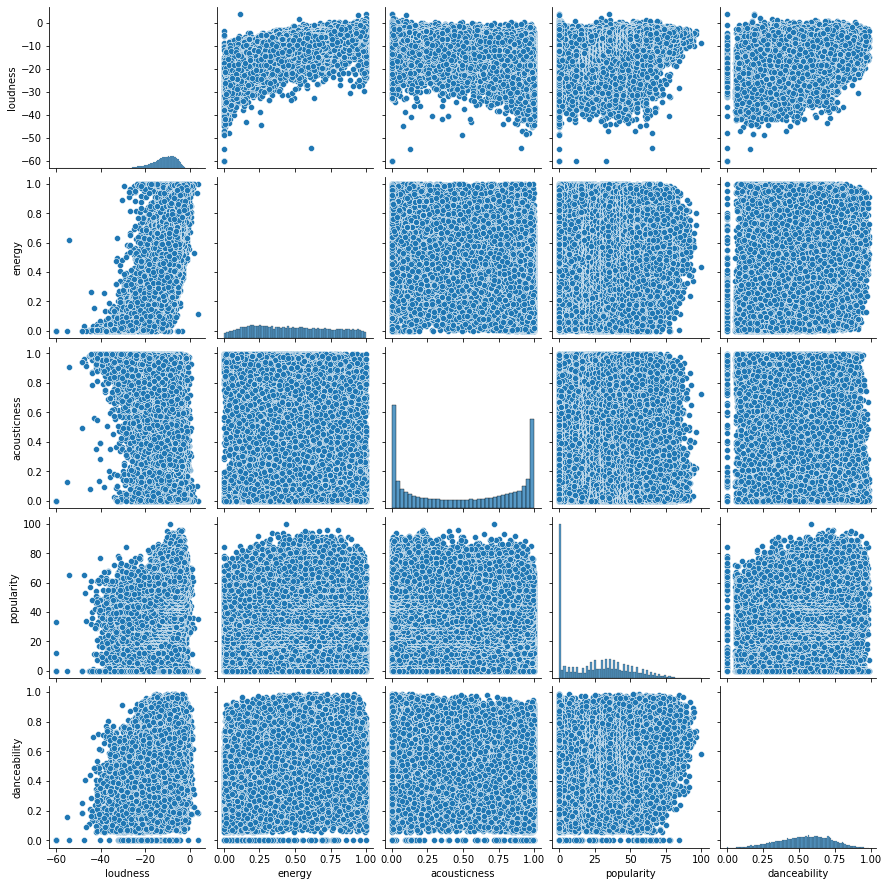

In [ ]:
sns.pairplot(df[['loudness', 'energy', 'acousticness', 'popularity', 'danceability']])

## Visualizations of Aggregated Forms Based on Features

### Year Interval Aggregated Forms 

In [ ]:
df_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


In [ ]:
#Change duration from milliseconds to seconds 
df_year['duration'] = df_year['duration_ms'].apply(lambda x:round(x/1000))
df_year.drop('duration_ms',axis=1,inplace=True)

In [ ]:
def assign_year(year):
    
    if year >= 1920 and year < 1930:
        return "1920s"
    elif year >= 1930 and year < 1940:
        return "1930s"
    elif year >= 1940 and year < 1950:
        return "1940s"
    elif year >= 1950 and year < 1960:
        return "1950s"
    elif year >= 1960 and year < 1970:
        return "1960s"
    elif year >= 1970 and year < 1980:
        return "1970s"
    elif year >= 1980 and year < 1990:
        return "1980s"
    elif year >= 1990 and year < 2000:
        return "1990s"
    elif year >= 2000 and year < 2010:
        return "2000s"
    elif year >= 2010 and year < 2020:
        return "2010s"
    else:
        return "2020s"

df_year["Year_Interval"] = df_year["year"].apply(assign_year)  # resulting series will be stored in a new column

I grouped years based on year interval and add a new column to the data frame which store year interval.

In [ ]:
df_year.head()

,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration,Year_Interval
0,1920,0.631242,0.515750,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1,238,1920s
1,1921,0.862105,0.432171,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1,258,1920s
2,1922,0.828934,0.575620,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1,140,1920s
3,1923,0.957247,0.577341,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1,178,1920s
4,1924,0.940200,0.549894,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1,191,1920s


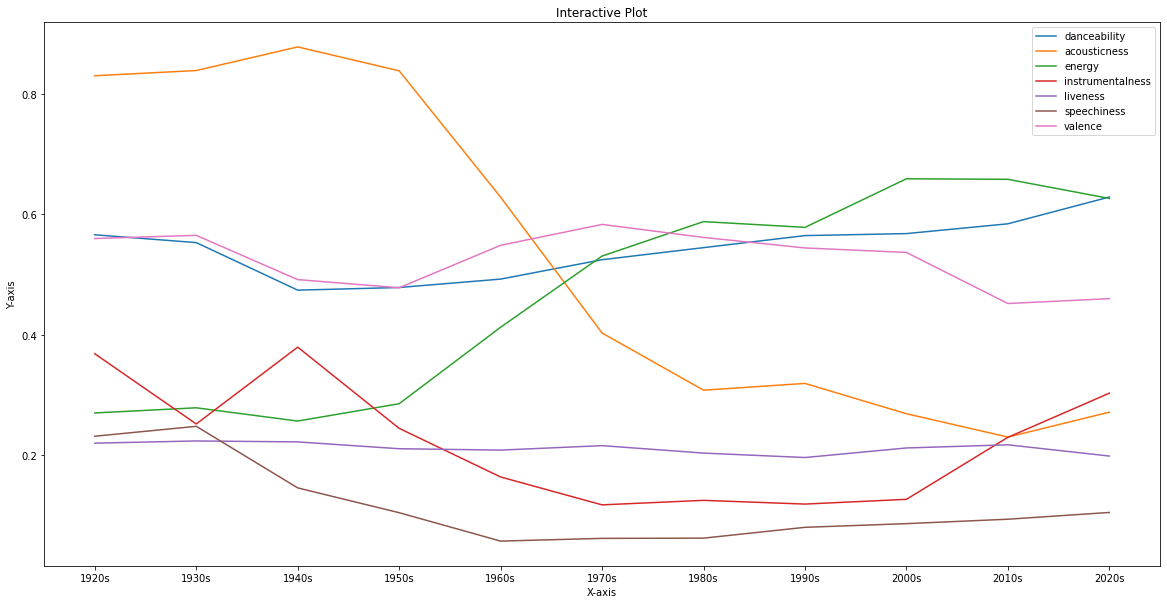

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_year.groupby(by = 'Year_Interval')['danceability'].mean(), label='danceability')
plt.plot(df_year.groupby(by = 'Year_Interval')['acousticness'].mean(), label='acousticness')
plt.plot(df_year.groupby(by = 'Year_Interval')['energy'].mean(), label='energy')
plt.plot(df_year.groupby(by = 'Year_Interval')['instrumentalness'].mean(), label='instrumentalness')
plt.plot(df_year.groupby(by = 'Year_Interval')['liveness'].mean(), label='liveness')
plt.plot(df_year.groupby(by = 'Year_Interval')['speechiness'].mean(), label='speechiness')
plt.plot(df_year.groupby(by = 'Year_Interval')['valence'].mean(), label='valence')
# Add labels and title
plt.title("Interactive Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
 
plt.legend()
plt.show()

We wanted to see the change in the value of the features of the songs in the 100 years between 1920-2020. Looking at the graph, the acousticness value has experienced a noticeable decline after 1950. Nevertheless, the value of energy property has been on the rise since 1950. Valence, liveness and danceability values did not change significantly in years.

## Analysis of the Most Popular Artists and Songs

### Most Popular 10 Artists

In [ ]:
print("Most popular 10 artists")
m_p_a = df_artist.sort_values("popularity",ascending=False)
m_p_10_artists = m_p_a[:10]
m_p_10_artists

Most popular 10 artists


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
4212,CJ,0.1900,0.711,123429.0,0.598,0.000000,0.1500,-7.621,0.1820,140.175,0.737,94.0,3,0,2
3767,Boza,0.3620,0.725,186133.0,0.756,0.000685,0.1030,-5.013,0.0572,100.070,0.828,92.0,4,1,2
13963,Joel Corry,0.1680,0.734,166028.0,0.874,0.000011,0.0489,-3.158,0.0662,122.953,0.905,91.0,8,1,1
14688,Juhn,0.1220,0.713,232853.0,0.617,0.000000,0.0962,-4.637,0.0887,168.021,0.682,91.0,8,1,2
23922,Ritt Momney,0.0563,0.399,210463.0,0.491,0.000890,0.1100,-10.778,0.0538,91.066,0.151,89.0,6,0,2
16413,Lele Pons,0.0907,0.905,155825.0,0.686,0.000000,0.2660,-3.152,0.0664,103.013,0.963,89.0,0,1,1
17173,Los Legendarios,0.3100,0.823,213314.0,0.821,0.000004,0.1430,-3.402,0.1660,99.999,0.791,89.0,8,0,2
14918,KIDDO,0.2860,0.504,190218.0,0.760,0.000000,0.1510,-4.246,0.0426,183.933,0.640,87.0,4,1,2
21024,Nuka,0.1050,0.738,192921.0,0.850,0.000000,0.2300,-3.049,0.0642,98.013,0.865,86.0,8,1,2
13565,Jerry Di,0.8190,0.854,197587.0,0.525,0.000000,0.1460,-4.426,0.2140,97.054,0.630,86.0,1,1,2


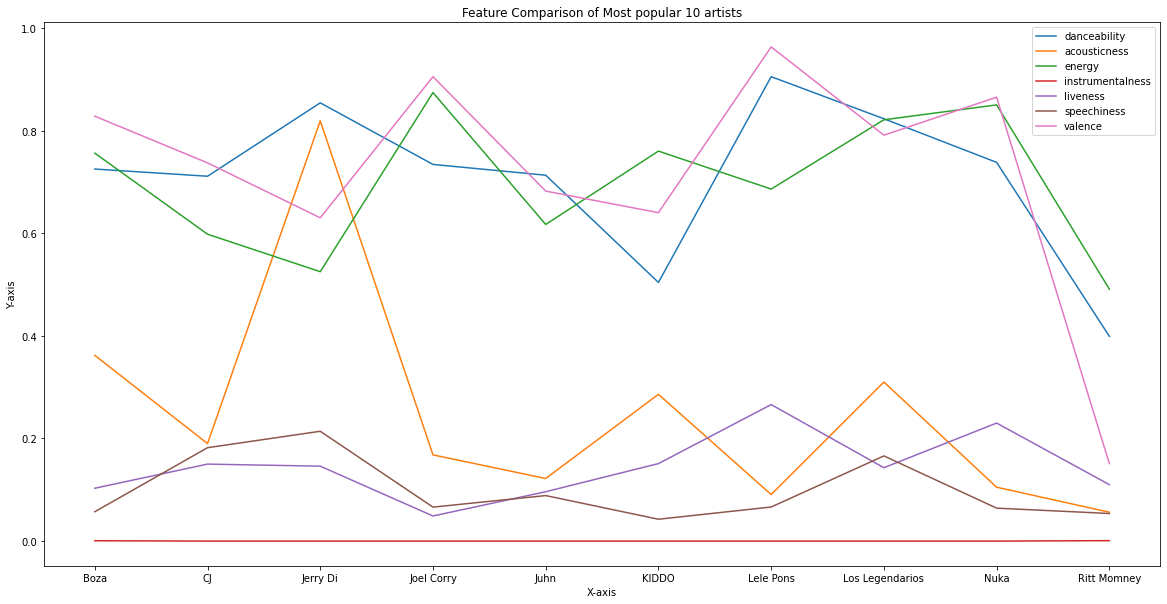

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(m_p_10_artists.groupby(by = 'artists')['danceability'].mean(), label='danceability')
plt.plot(m_p_10_artists.groupby(by = 'artists')['acousticness'].mean(), label='acousticness')
plt.plot(m_p_10_artists.groupby(by = 'artists')['energy'].mean(), label='energy')
plt.plot(m_p_10_artists.groupby(by = 'artists')['instrumentalness'].mean(), label='instrumentalness')
plt.plot(m_p_10_artists.groupby(by = 'artists')['liveness'].mean(), label='liveness')
plt.plot(m_p_10_artists.groupby(by = 'artists')['speechiness'].mean(), label='speechiness')
plt.plot(m_p_10_artists.groupby(by = 'artists')['valence'].mean(), label='valence')
# Add labels and title
plt.title("Feature Comparison of Most popular 10 artists")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
 
plt.legend()
plt.show()

We found 10 artists with the highest popularity value by listing them by popularity in the data. We drew a chart in order to correlate the 10 artists we found, according to some features found in their songs.
As we can see in the chart, the instrumentalness value is almost insignificant. At the same time, the value of danceability, valence and energy features is generally high and significant.

### Top Artists of each Year

In [ ]:
years = df.year.unique()
top_artists_each_year = [df.query('year==@year').sort_values("popularity",ascending=False).iloc[0] for year in years]
top_artists_each_year_df = pd.DataFrame(top_artists_each_year)
top_artists_each_year_df['artists'] = top_artists_each_year_df['artists'].apply(lambda x:x.replace("[","").replace("]","").replace("'",""))
top_artists_each_year_df['genres'] = [df_genre2[df_genre2.artists.str.contains(artists.split(",")[0])]["genres"].iloc[0].replace("[","").replace("]","") for artists in top_artists_each_year_df["artists"].values]

In [ ]:
fig = px.scatter(top_artists_each_year_df, x="year", y="popularity",hover_data=['artists','name'])
fig.update_traces(mode='markers', marker_line_width=2,marker=dict(size=10,color='rgba(30, 215, 96, .9)'))
fig.update_layout(title="Most Popular Artists and Songs Each Year")
fig.show()

### Most Popular 10 Songs

In [ ]:
print("Most Popular 10 Songs")
m_p_s = df.sort_values("popularity",ascending=False)
m_p_10_songs = m_p_s[:10]
m_p_10_songs

Most Popular 10 Songs


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration
20062,0.7210,['Olivia Rodrigo'],0.585,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.132,2021,242
19862,0.2210,"['24kGoldn', 'iann dior']",0.700,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020,141
19866,0.4680,['Ariana Grande'],0.737,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020,172
19886,0.4010,"['Bad Bunny', 'Jhay Cortez']",0.731,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.145,2020,205
19976,0.2120,['KAROL G'],0.863,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.838,2020,179
19868,0.2370,['Ariana Grande'],0.830,0.585,1,6Im9k8u9iIzKMrmV7BWtlF,0.000000,0,0.2480,-6.476,1,34+35,94,2020-10-30,0.0940,109.978,0.485,2020,174
19870,0.1900,['CJ'],0.711,0.598,1,5vGLcdRuSbUhD8ScwsGSdA,0.000000,3,0.1500,-7.621,0,Whoopty,94,2020-08-20,0.1820,140.175,0.737,2020,123
19872,0.2130,['The Kid LAROI'],0.662,0.413,1,27OeeYzk6klgBh83TSvGMA,0.000000,0,0.1340,-7.357,1,WITHOUT YOU,94,2020-11-06,0.0299,93.005,0.467,2020,161
19876,0.2180,['Billie Eilish'],0.889,0.340,0,54bFM56PmE4YLRnqpW6Tha,0.130000,11,0.0550,-7.773,0,Therefore I Am,94,2020-11-12,0.0697,94.009,0.716,2020,174
19928,0.0303,"['Bad Bunny', 'ROSALÍA']",0.856,0.618,0,2XIc1pqjXV3Cr2BQUGNBck,0.000000,7,0.0866,-4.892,1,LA NOCHE DE ANOCHE,94,2020-11-27,0.2860,81.993,0.391,2020,203


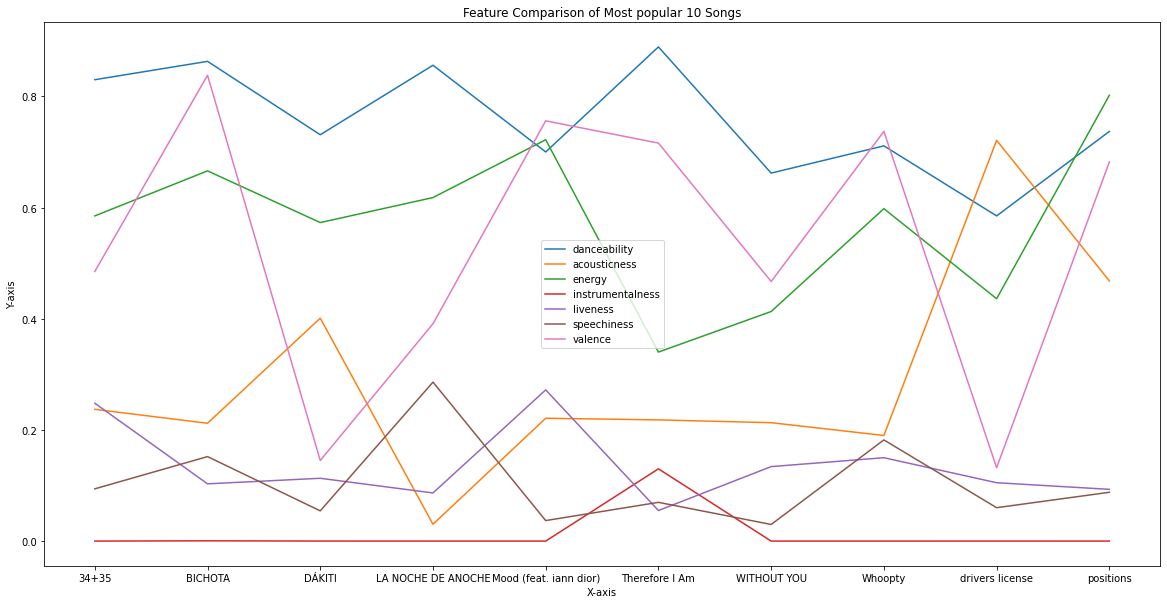

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(m_p_10_songs.groupby(by = 'name')['danceability'].mean(), label='danceability')
plt.plot(m_p_10_songs.groupby(by = 'name')['acousticness'].mean(), label='acousticness')
plt.plot(m_p_10_songs.groupby(by = 'name')['energy'].mean(), label='energy')
plt.plot(m_p_10_songs.groupby(by = 'name')['instrumentalness'].mean(), label='instrumentalness')
plt.plot(m_p_10_songs.groupby(by = 'name')['liveness'].mean(), label='liveness')
plt.plot(m_p_10_songs.groupby(by = 'name')['speechiness'].mean(), label='speechiness')
plt.plot(m_p_10_songs.groupby(by = 'name')['valence'].mean(), label='valence')
# Add labels and title
plt.title("Feature Comparison of Most popular 10 Songs")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
 
plt.legend()
plt.show()

### Genre Names and Sub-genres

In [ ]:
genre_names_text = " ".join(genre_df['genres'].tolist()).split(" ")
column_names = ["word","count"]
most_common_words_in_genres_df = pd.DataFrame([dict(zip(column_names,word_count)) for word_count in Counter(genre_names_text).most_common(30)])

In [ ]:
fig = px.bar(most_common_words_in_genres_df.sort_values("count"),x="count",y="word",labels={
                     "word": "Word in Genres",
                     "count": "Word Frequency"},orientation='h')
fig.update_layout(height=600, width=1100, title_text="Most Common Words in Genre Names")

fig.show()

### How Songs of Different Genres Change Over Time

In [ ]:
import re

In [ ]:
df['artists'][174384]

"['DJ Combo', 'Sander-7', 'Tony T']"

In [ ]:
row_example = df['artists'][174384]
re.findall(r'[\']([\w\s-]+)[\']', row_example)

['DJ Combo', 'Sander-7', 'Tony T']

In [ ]:
df['artists'] = df['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
df.head()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration
0,0.991000,[Mamie Smith],0.598,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,168
1,0.643000,[],0.852,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,150
2,0.993000,[Mamie Smith],0.647,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,164
3,0.000173,[Oscar Velazquez],0.730,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,422
4,0.295000,[Mixe],0.704,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,165


In [ ]:
df.shape

(174389, 19)

In [ ]:
df = df.explode('artists')
df.tail()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration
174384,0.00917,Tony T,0.792,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020,148
174385,0.79500,Alessia Cara,0.429,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021,145
174386,0.80600,Roger Fly,0.671,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020,218
174387,0.92000,Taylor Swift,0.462,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021,244
174388,0.23900,Roger Fly,0.677,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020,198


In [ ]:
df.shape

(229540, 19)

In [ ]:
a = df_genre2.drop(['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','popularity','key','mode','count'],axis=1)

In [ ]:
merged = pd.merge(df, a, on="artists")
merged.tail()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration,genres
218698,0.966,Johannes Bornlöf,0.269,0.0926,0,1Svqb7CX6rQvJpZY3iVBXh,0.890,9,0.0992,-24.280,0,Divenire,0,2021-01-23,0.0609,120.323,0.1020,2021,424,"['background music', 'calming instrumental', '..."
218699,0.995,Johannes Bornlöf,0.297,0.0287,0,2LeqqwzobL5ktfQhWA3bHh,0.908,8,0.0995,-30.008,1,Nuvole bianche,0,2021-01-23,0.0564,141.636,0.0678,2021,349,"['background music', 'calming instrumental', '..."
218700,0.995,Johannes Bornlöf,0.343,0.0165,0,3Glmyv3hbGGTgeR3FZrxJA,0.878,9,0.0774,-30.915,0,Una Mattina,0,2021-01-23,0.0455,126.970,0.1510,2021,207,"['background music', 'calming instrumental', '..."
218701,0.966,Johannes Bornlöf,0.269,0.0926,0,4yBReaKJW78ZYCHpc1cfaK,0.890,9,0.0992,-24.280,0,Divenire,0,2021-01-23,0.0609,120.323,0.1020,2021,424,"['background music', 'calming instrumental', '..."
218702,0.988,Johannes Bornlöf,0.316,0.0573,0,6QGVWUbmlePAiY5zJjfCmT,0.879,3,0.1200,-24.121,1,Night,0,2021-01-23,0.0515,81.070,0.0373,2021,303,"['background music', 'calming instrumental', '..."


In [ ]:
merged.shape

(218703, 20)

In [ ]:
merged.columns

Index(['acousticness', 'artists', 'danceability', 'energy', 'explicit', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year',
       'duration', 'genres'],
      dtype='object')

In [ ]:
showtunes = merged[merged['genres']=="['show tunes']"]
showtunes.head()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration,genres
80549,0.844,Heather Menzies,0.512,0.2160,0,1L6NSZq5R7lMcVw0YOrUE9,0.000000,10,0.2340,-12.152,1,Do-Re-Mi,52,1965,0.0624,127.498,0.502,1965,333,['show tunes']
80550,0.829,Heather Menzies,0.667,0.2550,0,6GTVtjlDMEtnM2paZZ6VNe,0.000000,0,0.2300,-11.409,1,The Lonely Goatherd,47,1965,0.0534,100.285,0.605,1965,190,['show tunes']
80551,0.848,Heather Menzies,0.528,0.1530,0,2NMznAoH3IluVA0Hyx1Or8,0.000041,10,0.1350,-16.398,1,"So Long, Farewell",46,1965,0.0497,119.674,0.357,1965,174,['show tunes']
80552,0.929,Heather Menzies,0.289,0.1250,0,5q7VEpK3tqQTSgLkbTlaYv,0.000048,10,0.0858,-15.797,1,Edelweiss (Reprise),47,1965,0.0401,122.307,0.223,1965,110,['show tunes']
80553,0.963,Heather Menzies,0.257,0.0505,0,7LEVzmS5wkI2yBSgkBmw8V,0.000082,5,0.1080,-21.689,1,The Sound of Music,45,1965,0.0379,82.333,0.154,1965,130,['show tunes']


In [ ]:
kpop = merged[merged['genres']=="['k-pop', 'k-pop girl group']"]
kpop.head()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration,genres
130205,0.4070,Loon,0.926,0.512,0,3nc26BadAx1ovvrzxcj80x,0.000000,1,0.0310,-6.179,1,I Need A Girl PT II - Album Version (Edited),54,2002-01-01,0.254,100.037,0.749,2002,286,"['k-pop', 'k-pop girl group']"
130206,0.4210,Loon,0.713,0.471,0,6Wt5QBzHp9vdSLAFlvdnDQ,0.000000,1,0.0308,-7.392,0,"I Need a Girl (Pt. 2) [feat. Loon, Ginuwine & ...",67,2004-03-09,0.483,199.765,0.781,2004,286,"['k-pop', 'k-pop girl group']"
130207,0.3970,Loon,0.660,0.707,0,7lVNTXkI3cHFvcXiI8damb,0.000000,6,0.2110,-5.758,1,I Need a Girl (Pt. 1) [feat. Usher & Loon],63,2005-10-04,0.208,89.279,0.761,2005,269,"['k-pop', 'k-pop girl group']"
130208,0.4590,Loon,0.740,0.895,0,6E68HHJ3fbo5vub3NMsBRz,0.000007,2,0.0433,-6.360,0,Down for Me (feat. Mario Winans),45,2003,0.189,196.082,0.958,2003,259,"['k-pop', 'k-pop girl group']"
181925,0.0992,Momo,0.525,0.913,0,4VOaliNOCGwVbS7NNae4S1,0.000000,4,0.2600,-2.974,1,Škola Rapu (DJ Wich Remix) [feat. Separ & Momo],25,2014-01-02,0.281,88.585,0.538,2014,276,"['k-pop', 'k-pop girl group']"


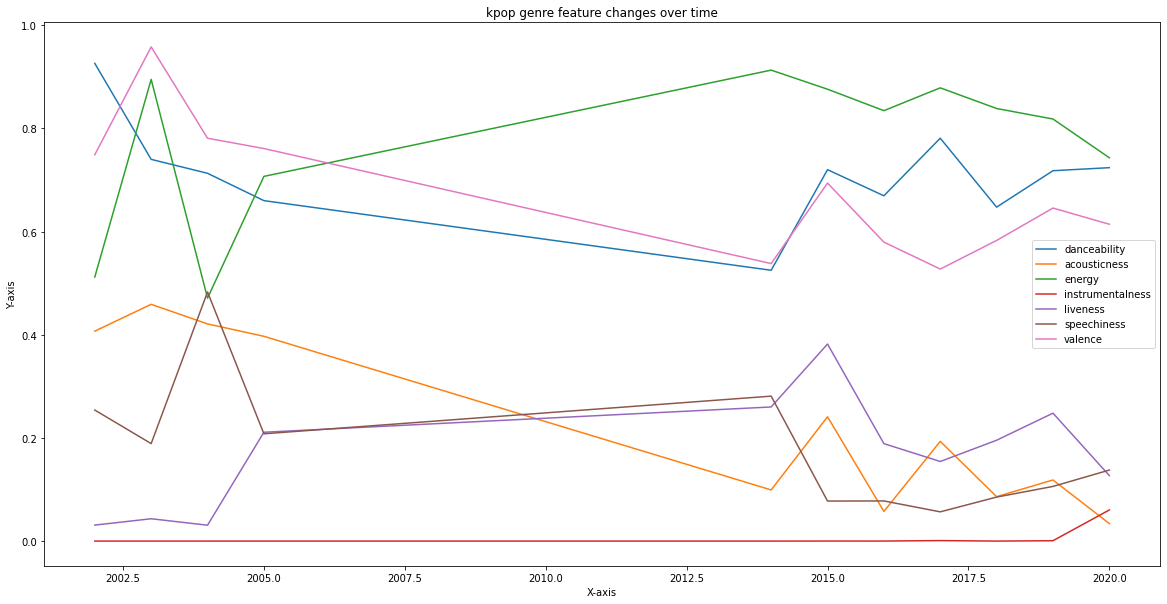

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(kpop.groupby(by = 'year')['danceability'].mean(), label='danceability')
plt.plot(kpop.groupby(by = 'year')['acousticness'].mean(), label='acousticness')
plt.plot(kpop.groupby(by = 'year')['energy'].mean(), label='energy')
plt.plot(kpop.groupby(by = 'year')['instrumentalness'].mean(), label='instrumentalness')
plt.plot(kpop.groupby(by = 'year')['liveness'].mean(), label='liveness')
plt.plot(kpop.groupby(by = 'year')['speechiness'].mean(), label='speechiness')
plt.plot(kpop.groupby(by = 'year')['valence'].mean(), label='valence')
# Add labels and title
plt.title("kpop genre feature changes over time")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
 
plt.legend()
plt.show()

We tried to find an answer to this question: "how song of different genres change over time?"  For this purpose, we saw how the characteristics of the kpop genre we selected above have changed over the years. For the Kpop genre, from 2002 to 2003 the value of energy suddenly rose and arrive to top situation. It got one of its lowest values in 2004. Energy and speechiness have experienced opposite fluctuations over the years. Energy, danceability and valence values have always been high.

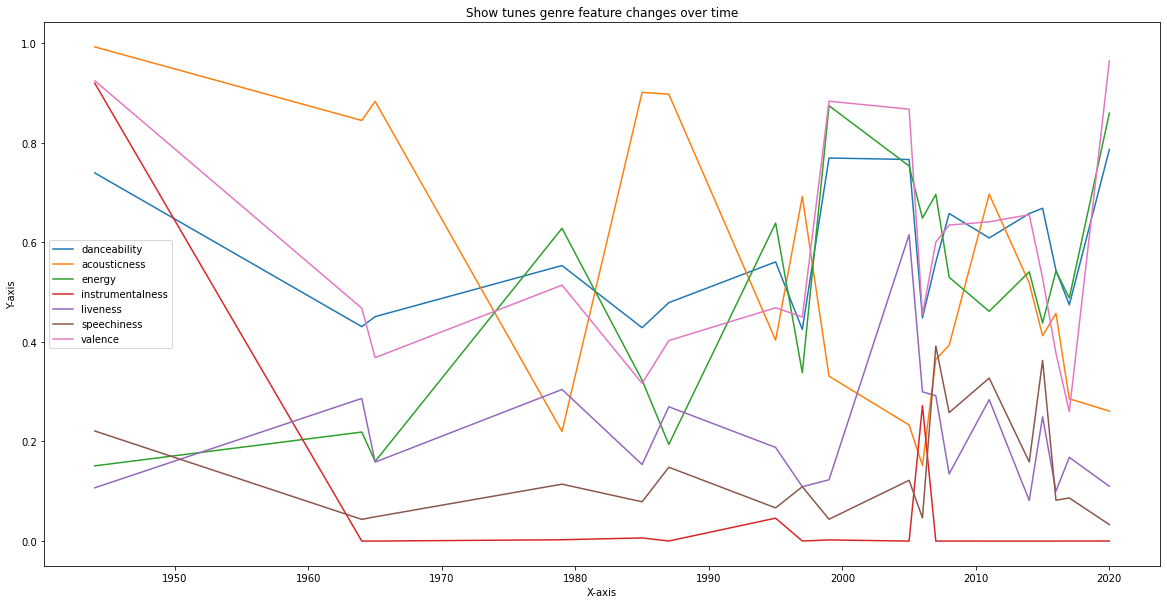

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(showtunes.groupby(by = 'year')['danceability'].mean(), label='danceability')
plt.plot(showtunes.groupby(by = 'year')['acousticness'].mean(), label='acousticness')
plt.plot(showtunes.groupby(by = 'year')['energy'].mean(), label='energy')
plt.plot(showtunes.groupby(by = 'year')['instrumentalness'].mean(), label='instrumentalness')
plt.plot(showtunes.groupby(by = 'year')['liveness'].mean(), label='liveness')
plt.plot(showtunes.groupby(by = 'year')['speechiness'].mean(), label='speechiness')
plt.plot(showtunes.groupby(by = 'year')['valence'].mean(), label='valence')
# Add labels and title
plt.title("Show tunes genre feature changes over time")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
 
plt.legend()
plt.show()

For the show tunes type, there are noticeable fluctuations. Over time, its features have always changed and differed from time to time. The acousticness feature, which was at its peak before the 1950s, declined over time and took one of its lowest values in the 1980s. Parallel to that, instrumentalness was high in the early 1950s, but low in the 1965s. The most prominent and high-value property has been acousticness. Valence, energy and danceability have been rising values in 2015 and beyond for the show tunes.

## Future Work



Our second step is Statistical Analysis & Hypothesis Testing. In this step, we will check how features check how (or if) features contribute to popularity of songs and additionally, we will test statically the features of genres over the different periods.In the Maching Learning step, using various machine learning models, we will estimate the popularity of songs and study on efforts of hyper-parameter tuning to increase the performance of models and we will create a simple song recommendation system.

# **Step 2 : Statistical Analysis & Hypothesis Testing**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import special
from sklearn import datasets
from os.path import join
from scipy.stats import f_oneway

%matplotlib inline

# PART 1: Statistical tests to check how (or if) features contribute to popularity of songs

##*T-Test*

### **High-Low liveness contribution to Popularity** 
Hypothesis Test: We want to test whether there is significant differences in terms of popularity for high and low liveness level.

**Null Hypothesis ( $H_0$ )**: Means of popularity samples for high and low liveness are same.

$ H_0: \mu_{_1} = \mu_{_2} $


**Alternative Hypothesis ( $H_A$ )**: Means of popularity samples for high and low liveness are different.

$ H_A $:  Means $ \mu_{_1}, \mu_{_2}$ are not same.

Significance level: As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [ ]:
test_type = "popularity"

liveness_high = df[df["liveness"] >= 0.5][test_type]   # liveness high
liveness_low = df[df["liveness"] < 0.5][test_type]  # liveness low

In [ ]:
print(f"mean score of high liveness: {liveness_high.mean():.2f}")

mean score of high liveness: 19.49


In [ ]:
print(f"mean score of low liveness: {liveness_low.mean():.2f}")

mean score of low liveness: 23.95


Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

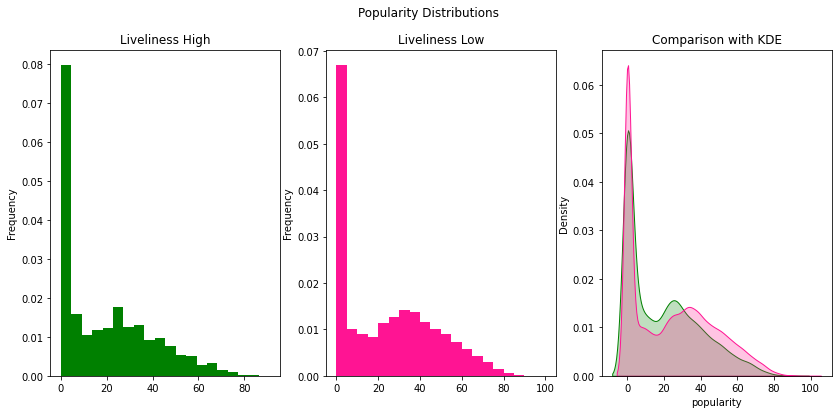

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
liveness_high.plot(kind="hist", ax=ax[0], bins=20, label="High", color="g", density=True)
ax[0].set_title("Liveliness High")

liveness_low.plot(kind="hist", ax=ax[1], bins=20, label="Low", color="deeppink", density=True)
ax[1].set_title("Liveliness Low")

sns.kdeplot(liveness_high, shade=True, label="Liveliness High", ax=ax[2], color="g")
sns.kdeplot(liveness_low, shade=True, label="Liveliness Low", ax=ax[2], color="deeppink")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")
plt.show()

In [ ]:
stats.ttest_ind(liveness_high,liveness_low, equal_var=False)

Ttest_indResult(statistic=-29.52125374321713, pvalue=4.0237133286477234e-188)

**Interpreting results:**

As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis. In addition, the test score is negative which indicates that high liveness' mean of popularity is lower than low liveness' mean of popularity.

### **High-Low tempo contribution to Popularity**

Hypothesis Test: We want to test whether there is significant differences in terms of popularity for high and low tempo level.

**Null Hypothesis ( $H_0$ )**: Means of popularity samples for high and low tempo are same.

$ H_0: \mu_{_1} = \mu_{_2} $ 

**Alternative Hypothesis ( $H_A$ )**: Means of popularity samples for high and low tempo are different.

$ H_A $:  Means $ \mu_{_1}, \mu_{_2}$ are not same.


Significance level: As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [ ]:
test_type = "popularity"

high_tempo = df[df["tempo"] >= 121][test_type]  # high 	tempo
low_tempo = df[df["tempo"] < 121][test_type]       # low 	tempo

In [ ]:
print(f"mean score of high tempo: {high_tempo.mean():.2f}")

mean score of high tempo: 25.05


In [ ]:
print(f"mean score of low tempo: {low_tempo.mean():.2f}")

mean score of low tempo: 22.54


Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

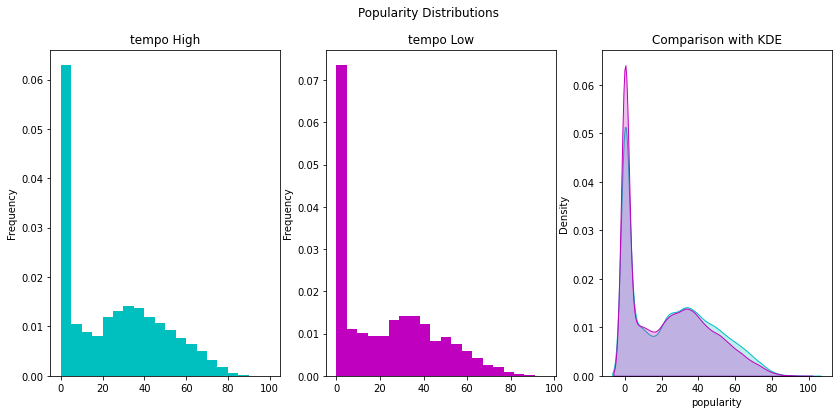

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
high_tempo.plot(kind="hist", ax=ax[0], bins=20, label="High", color="c", density=True)
ax[0].set_title("tempo High")

low_tempo.plot(kind="hist", ax=ax[1], bins=20, label="Low", color="m", density=True)
ax[1].set_title("tempo Low")

sns.kdeplot(high_tempo, shade=True, label="tempo High", ax=ax[2], color="c")
sns.kdeplot(low_tempo, shade=True, label="tempo Low", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")
plt.show()

In [ ]:
stats.ttest_ind(high_tempo, low_tempo, equal_var=False)  # since we have not equal variances

Ttest_indResult(statistic=26.647147862674725, pvalue=3.611956621227762e-156)

**Interpreting results:**

As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis. In addition, the test score is positive which indicates that high tempo's mean of popularity is higher than low tempo's mean of popularity.

###**High-Low valence contribution to Popularity**
Hypothesis Test: We want to test whether there is significant differences in terms of popularity for high and low valence level.

**Null Hypothesis ( $H_0$ )**: Means of popularity samples for high and low valence are same.

$ H_0: \mu_{_1} = \mu_{_2} $ 

**Alternative Hypothesis ( $H_A$ )**: Means of popularity samples for high and low valence are different.

$ H_A $:  Means $ \mu_{_1}, \mu_{_2}$ are not same.

Significance level: As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [ ]:
test_type = "popularity"

high_valence = df[df["valence"] >= 0.5][test_type]  # high 	valence
low_valence = df[df["valence"] < 0.5][test_type]       # low 	valence

In [ ]:
print(f"mean score of high danceability: {high_valence.mean():.2f}")

mean score of high danceability: 25.49


In [ ]:
print(f"mean score of low danceability: {low_valence.mean():.2f}")

mean score of low danceability: 21.67


Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

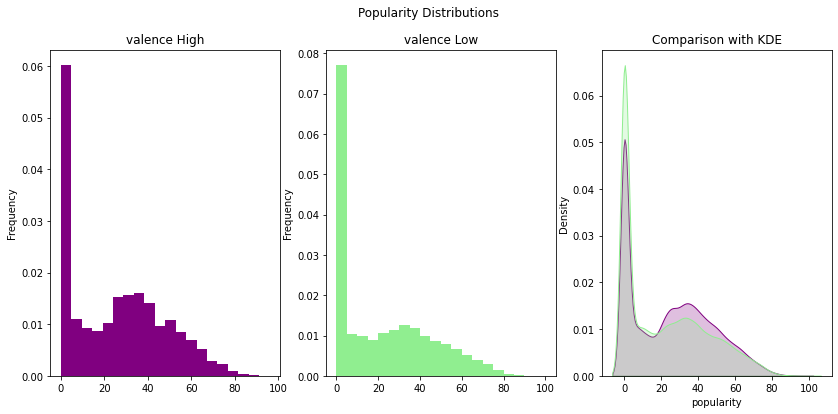

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
high_valence.plot(kind="hist", ax=ax[0], bins=20, label="High", color="purple", density=True)
ax[0].set_title("valence High")

low_valence.plot(kind="hist", ax=ax[1], bins=20, label="Low", color="lightgreen", density=True)
ax[1].set_title("valence Low")

sns.kdeplot(high_valence, shade=True, label="valence High", ax=ax[2], color="purple")
sns.kdeplot(low_valence, shade=True, label="valence Low", ax=ax[2], color="lightgreen")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")
plt.show()

In [ ]:
stats.ttest_ind(high_valence, low_valence, equal_var=False)  # since we have not equal variances

Ttest_indResult(statistic=41.385171367738906, pvalue=0.0)

**Interpreting results:**

As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis. In addition, the test score is positive which indicates that high valence's mean of popularity is higher than low valence's mean of popularity.




## *Anova Test*

### **High,medium,Low valence contribution to Popularity Hypothesis Test**

*You can use this test structure as a template for hypothesis tests in your projects.*

Hypothesis Test: We want to test whether there is significant differences in terms of popularity for different valence level.

**Null Hypothesis ($H_0$)**: Means of `popularity` samples for all valence levels are same (e.g. $ci_1$ denotes 1st color intensity sample)

$ H_0: \mu_{ci_1} = \mu_{ci_2} = \mu_{ci_3}$

**Alternative Hypothesis ($H_A$)**: Means of `popularity` samples for all valence levels are different

$ H_A:$ Means $\mu_{ci_1}, \mu_{ci_2}, \mu_{ci_3}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
def assign_target(valence):
    
    if valence >= 0.7:
        return 0
    elif valence >= 0.4 and valence < 0.7:
        return 1
    elif valence < 0.4:
        return 2

df["target_valence"] = df["valence"].apply(assign_target)  # resulting series will be stored in a new column

In [ ]:
sample_1, sample_2, sample_3 = [df[df['target_valence'] == i] for i in df.target_valence.unique()]

Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

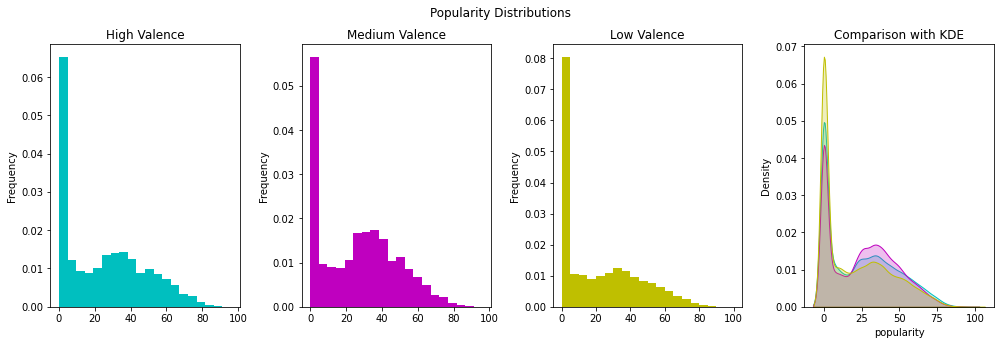

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(14,5))
        
sample_1['popularity'].plot(kind="hist", ax=ax[0], bins=20, label="High Valence", color="c", density=True)
ax[0].set_title("High Valence")

sample_2['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="Medium Valence", color="m", density=True)
ax[1].set_title("Medium Valence")

sample_3['popularity'].plot(kind="hist", ax=ax[2], bins=20, label="Low Valence", color="y", density=True)
ax[2].set_title("Low Valence")

sns.kdeplot(sample_1['popularity'], shade=True, label="High Valence", ax=ax[3], color="c")
sns.kdeplot(sample_2['popularity'], shade=True, label="Medium Valence", ax=ax[3], color="m")
sns.kdeplot(sample_3['popularity'], shade=True, label="Low Valence", ax=ax[3], color="y")
ax[3].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
f_stats, p_values = f_oneway(sample_1['popularity'].values, sample_2['popularity'].values, sample_3['popularity'].values)
p_values

0.0

**Interpreting results:**

As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis.

## *Chi-Square Test*

The Chi-Squared test is is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance.

Although we do not have multiple categorical attributes in our dataset, we can first create new categorical columns from our dataset and then apply Chi-Square Test to observe if there is a significant difference between samples.

### **Chi-Square test for Accousticness and Popularity**
We create Low, Average and High categories for popularity. Also we create Low, medium and high categories for accousticness.

**Null Hypothesis ($H_0$)**: Popularity rate and accousticness categories are independent.

**Alternative Hypothesis ($H_A$)**: Popularity rate and accousticness categories are dependent.

In [ ]:
# Creating a copy of the dataframe to not to change the original
df_c = df.copy()

# Categorizing some of the attributes
def categorize_popularity_rate(val):
  if val < 34:
    return 'Low popular'
  elif 34 <= val < 67:
    return 'Average popular'
  else:
    return 'High popular'

def categorize_acoustic(val):
  if val < 0.3:
    return 'Low acousticness'
  elif 0.33 <= val < 0.66:
    return 'Medium acousticness'
  else:
    return 'High accousticness'

In [ ]:
df_c['popularity_rate'] = df_c['popularity'].apply(categorize_popularity_rate)
df_c['acoustic_category'] = df_c['acousticness'].apply(categorize_acoustic)

In [ ]:
crosstab = pd.crosstab(df_c["popularity_rate"], df_c["acoustic_category"])
crosstab

acoustic_category,High accousticness,Low acousticness,Medium acousticness
popularity_rate,,,
Average popular,19294,37461,13343
High popular,1128,5786,1425
Low popular,95737,36689,18677


In [ ]:
from scipy.stats import chi2_contingency
chi2_test_stat, p_value, dof, expected_freqs = chi2_contingency(crosstab)
p_value

0.0

If we assume the level of significance as 0.05, we reject the null hypothesis. This means that popularity rate and acoustic category are dependent.

# PART 2: Statistical tests to check if significant differences exist between different eras

In [ ]:
def assign_year(year):
    
    if year >= 1920 and year < 1930:
        return "1920s"
    elif year >= 1930 and year < 1940:
        return "1930s"
    elif year >= 1940 and year < 1950:
        return "1940s"
    elif year >= 1950 and year < 1960:
        return "1950s"
    elif year >= 1960 and year < 1970:
        return "1960s"
    elif year >= 1970 and year < 1980:
        return "1970s"
    elif year >= 1980 and year < 1990:
        return "1980s"
    elif year >= 1990 and year < 2000:
        return "1990s"
    elif year >= 2000 and year < 2010:
        return "2000s"
    elif year >= 2010 and year < 2020:
        return "2010s"
    else:
        return "2020s"

merged["Year_Interval"] = merged["year"].apply(assign_year)  # resulting series will be stored in a new column

In [ ]:
latin = merged[merged['genres']=="['latin jazz', 'salsa', 'salsa puertorriquena', 'tropical']"]

In [ ]:
rock = merged[merged['genres']=="['album rock', 'classic rock', 'country rock', 'folk rock', 'hard rock', 'heartland rock', 'mellow gold', 'pop rock', 'psychedelic rock', 'rock', 'roots rock', 'soft rock']"]

### Sample Hypothesis Test (T-Tests)

### **Comparison of before 2000 and after 2000 latin music genre in terms of Popularity**
Hypothesis Test: We want to test whether there is significant differences in terms of popularity between before and after 2000 latin music genre.

**Null Hypothesis ( $H_0$ )**: Means of popularity samples for before and after 2000 are same.

$ H_0: \mu_{_1} = \mu_{_2} $ 

**Alternative Hypothesis ( $H_A$ )**: Means of popularity samples for before and after 2000 are different.

$ H_A $:  Means $ \mu_{_1}, \mu_{_2}$ are not same.


Significance level: As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [ ]:
test_type = "popularity"

before20 = latin[latin["year"] < 2000][test_type]  

after20 = latin[latin["year"] >= 2000][test_type]       

In [ ]:
print(f"mean score of before 2000 latin music: {before20.mean():.2f}")

mean score of before 2000 latin music: 37.97


In [ ]:
print(f"mean score of after 2000 latin music: {after20.mean():.2f}")

mean score of after 2000 latin music: 8.97


Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

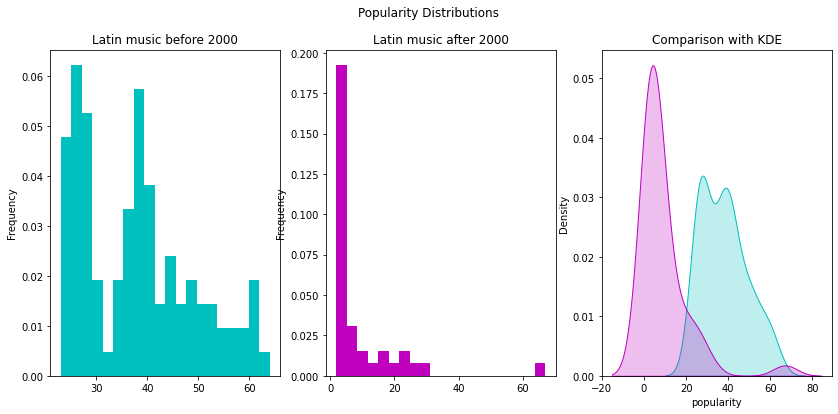

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
before20.plot(kind="hist", ax=ax[0], bins=20, label="before 2000", color="c", density=True)
ax[0].set_title("Latin music before 2000")

after20.plot(kind="hist", ax=ax[1], bins=20, label="After 2000", color="m", density=True)
ax[1].set_title("Latin music after 2000")

sns.kdeplot(before20, shade=True, label="before 2000", ax=ax[2], color="c")
sns.kdeplot(after20, shade=True, label="After 2000", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")
plt.show()

In [ ]:
stats.ttest_ind(before20, after20, equal_var=False)  # since we have not equal variances

Ttest_indResult(statistic=13.384338913097332, pvalue=2.0541896815865994e-20)

**Interpreting results:**

As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of popularity samples are not the same. Here, we reject the null hypothesis. In addition, the test score is positive which indicates that mean of popularity of before 2000 is higher than mean of popularity of after 2000.

### **Comparison of before 2000 and after 2000 latin music genre in terms of Acousticness**
Hypothesis Test: We want to test whether there is significant differences in terms of acousticness between before and after 2000 latin music genre.

**Null Hypothesis ( $H_0$ )**: Means of acousticness samples for before and after 2000 are same.

$ H_0: \mu_{_1} = \mu_{_2} $ 


**Alternative Hypothesis ( $H_A$ )**: Means of acousticness samples for before and after 2000 are different.

$ H_A $:  Means $ \mu_{_1}, \mu_{_2}$ are not same.


Significance level: As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [ ]:
test_type = "acousticness"

before20 = latin[latin["year"] < 2000][test_type]  

after20 = latin[latin["year"] >= 2000][test_type]       

In [ ]:
print(f"mean score of before 2000 latin music: {before20.mean():.2f}")

mean score of before 2000 latin music: 0.57


In [ ]:
print(f"mean score of after 2000 latin music: {after20.mean():.2f}")

mean score of after 2000 latin music: 0.47


Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

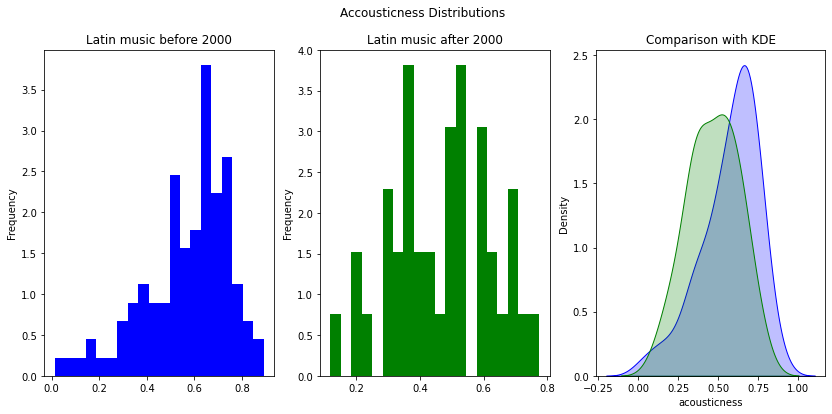

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
before20.plot(kind="hist", ax=ax[0], bins=20, label="before 2000", color="b", density=True)
ax[0].set_title("Latin music before 2000")

after20.plot(kind="hist", ax=ax[1], bins=20, label="After 2000", color="g", density=True)
ax[1].set_title("Latin music after 2000")

sns.kdeplot(before20, shade=True, label="before 2000", ax=ax[2], color="b")
sns.kdeplot(after20, shade=True, label="After 2000", ax=ax[2], color="g")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Accousticness Distributions")
plt.show()

In [ ]:
stats.ttest_ind(before20, after20, equal_var=False)  # since we have not equal variances

Ttest_indResult(statistic=3.3148504331514936, pvalue=0.0013782169897933528)

**Interpreting results:**

As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of accousticness samples are not the same. Here, we reject the null hypothesis. In addition, the test score is positive which indicates that mean of accousticness of before 2000 is higher than mean of accousticness of after 2000.

### **Comparison of 1970s and 1980s Rock music genre in terms of Popularity**
Hypothesis Test: We want to test whether there is significant differences in terms of popularity between 1970s and 1980s rock music genre.

**Null Hypothesis ( $H_0$ )**: Means of popularity samples for 1970s and 1980s are same.

$ H_0: \mu_{_1} = \mu_{_2} $ 


**Alternative Hypothesis ( $H_A$ )**: Means of popularity samples for 1970s and 1980s are different.

$ H_A $:  Means $ \mu_{_1}, \mu_{_2}$ are not same.

Significance level: As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [ ]:
test_type = "popularity"

rock_1970 = rock[rock["Year_Interval"] == "1970s"][test_type]  # 1970
rock_1980 = rock[rock["Year_Interval"] == "1980s"][test_type]  # 1980

In [ ]:
print(f"mean score of 1970s rock: {rock_1970.mean():.2f}")

mean score of 1970s rock: 33.53


In [ ]:
print(f"mean score of 1980s rock: {rock_1980.mean():.2f}")

mean score of 1980s rock: 33.00


Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

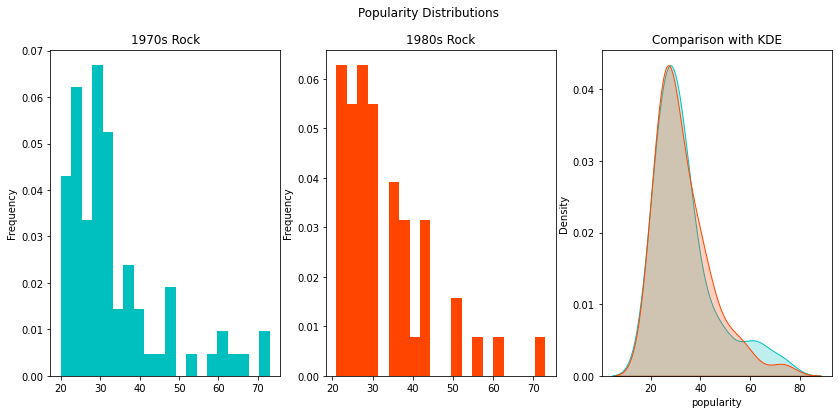

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
rock_1970.plot(kind="hist", ax=ax[0], bins=20, label="1970", color="c", density=True)
ax[0].set_title("1970s Rock")

rock_1980.plot(kind="hist", ax=ax[1], bins=20, label="1980", color="orangered", density=True)
ax[1].set_title("1980s Rock")

sns.kdeplot(rock_1970, shade=True, label="1970s", ax=ax[2], color="c")
sns.kdeplot(rock_1980, shade=True, label="1980s", ax=ax[2], color="orangered")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Popularity Distributions")
plt.show()

In [ ]:
stats.ttest_ind(rock_1970, rock_1980, equal_var=False)  # since we have not equal variances

Ttest_indResult(statistic=0.2517585667597425, pvalue=0.8016954861145897)

**Interpreting results:**

As p-value we obtained is larger than the threshold significance level 0.05, we fail to reject the null hypothesis. So there is no significant difference between 1970s and 1980s rock music genre in terms of popularity.

### **Comparison of 1970s and 1980s Rock music genre in terms of Acousticness**
Hypothesis Test: We want to test whether there is significant differences in terms of acousticness between 1970s and 1980s rock music genre.

**Null Hypothesis ( $H_0$ )**: Means of acousticness samples for 1970s and 1980s are same.

$ H_0: \mu_{_1} = \mu_{_2} $ 

**Alternative Hypothesis ( $H_A$ )**: Means of acousticness samples for 1970s and 1980s are different.

$ H_A $:  Means $ \mu_{_1}, \mu_{_2}$ are not same.

Significance level: As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

In [ ]:
test_type = "acousticness"

rock_1970 = rock[rock["Year_Interval"] == "1970s"][test_type]  # 1970
rock_1980 = rock[rock["Year_Interval"] == "1980s"][test_type]  # 1980

In [ ]:
print(f"mean score of 1970s rock: {rock_1970.mean():.2f}")

mean score of 1970s rock: 0.21


In [ ]:
print(f"mean score of 1980s rock: {rock_1980.mean():.2f}")

mean score of 1980s rock: 0.14


Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

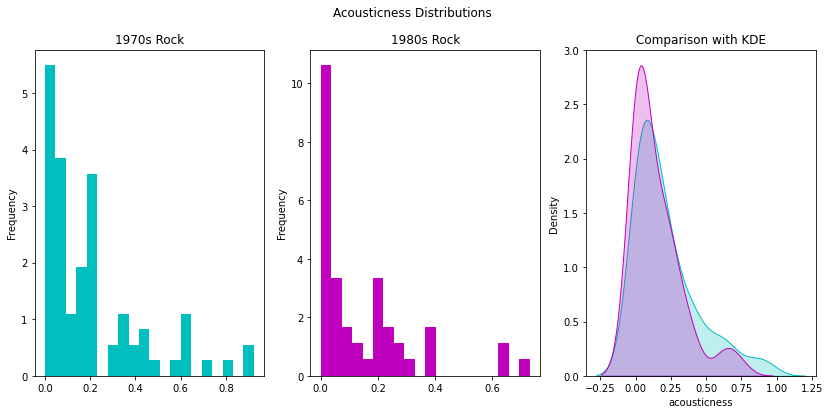

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
rock_1970.plot(kind="hist", ax=ax[0], bins=20, label="1970", color="c", density=True)
ax[0].set_title("1970s Rock")

rock_1980.plot(kind="hist", ax=ax[1], bins=20, label="1980", color="m", density=True)
ax[1].set_title("1980s Rock")

sns.kdeplot(rock_1970, shade=True, label="1970s", ax=ax[2], color="c")
sns.kdeplot(rock_1980, shade=True, label="1980s", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Acousticness Distributions")
plt.show()

In [ ]:
stats.ttest_ind(rock_1970, rock_1980, equal_var=False)  # since we have not equal variances

Ttest_indResult(statistic=1.831512639288523, pvalue=0.06953943159077153)

**Interpreting results:**

As p-value we obtained is larger than the threshold significance level 0.05, we fail to reject the null hypothesis. So there is no significant difference between 1970s and 1980s rock music genre in terms of accousticness.

# STEP 3 Machine Learning

# Prediction of song popularity with various machine learning models

## Model 1 Multilinear Regression

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
ndf = df.drop(["artists", "mode", "id", "explicit", "key", "name", "release_date", "year"], axis=1)

ndf.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,duration,target_valence
0,0.991000,0.598,0.224,0.000522,0.3790,-12.628,12,0.0936,149.976,0.6340,168,1
1,0.643000,0.852,0.517,0.026400,0.0809,-7.261,7,0.0534,86.889,0.9500,150,0
2,0.993000,0.647,0.186,0.000018,0.5190,-12.098,4,0.1740,97.600,0.6890,164,1
3,0.000173,0.730,0.798,0.801000,0.1280,-7.311,17,0.0425,127.997,0.0422,422,2
4,0.295000,0.704,0.707,0.000246,0.4020,-6.036,2,0.0768,122.076,0.2990,165,2


In [ ]:
features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "duration"]
X = ndf[features].values  # converting to column vector
target = ndf['popularity'].values

# train-test split
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, target, test_size=0.20, random_state=42)

# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# let's have a look at the coefficients, 
# i.e m values
coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])  
coeff_df

,Coefficient
acousticness,-20.715136
danceability,7.882824
energy,0.306764
instrumentalness,-14.456002
liveness,-8.878055
loudness,0.087590
speechiness,-24.850025
tempo,-0.000364
valence,-4.223269
duration,-0.001249


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 356.5217690000457
mae: 15.24227055894315
rmse: 18.881784052362363


mse is too huge, not a good result.

### After Standardization

In [ ]:
df_std = (ndf - ndf.mean()) / ndf.std()
df_std.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,duration,target_valence
count,2.295400e+05,2.295400e+05,2.295400e+05,2.295400e+05,2.295400e+05,2.295400e+05,2.295400e+05,2.295400e+05,2.295400e+05,2.295400e+05,2.295400e+05,2.295400e+05
mean,3.228639e-14,1.051931e-13,-2.264410e-14,2.520952e-14,-5.957940e-14,7.805089e-14,2.341130e-14,-5.319880e-15,7.658296e-14,-2.479129e-16,4.098016e-17,8.585122e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.425489e+00,-2.812142e+00,-1.627025e+00,-6.326001e-01,-1.176671e+00,-7.739360e+00,-1.064800e+00,-5.929267e-01,-3.793793e+00,-1.822657e+00,-1.498677e+00,-1.386898e+00
25%,-1.112512e+00,-7.243805e-01,-8.619001e-01,-6.325963e-01,-6.286071e-01,-5.920530e-01,-1.064800e+00,-3.919656e-01,-7.773162e-01,-8.501560e-01,-4.752034e-01,-1.386898e+00
50%,2.437182e-01,5.447369e-02,-1.256477e-01,-6.298723e-01,-4.093815e-01,1.529501e-01,-1.165037e-01,-3.364515e-01,-4.695493e-02,1.920136e-02,-2.001450e-01,-1.493770e-01
75%,1.018707e+00,7.630146e-01,8.271495e-01,5.495407e-01,3.305048e-01,7.650739e-01,7.414784e-01,-1.599166e-01,6.051058e-01,8.296192e-01,2.156409e-01,1.088144e+00
max,1.156080e+00,2.531663e+00,1.982055e+00,2.229726e+00,4.303968e+00,2.658929e+00,3.450895e+00,4.797493e+00,4.210711e+00,1.861060e+00,3.261496e+01,1.088144e+00


In [ ]:
features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "duration"]
X = df_std[features].values  # converting to column vector
target = df_std['popularity'].values

# train-test split
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, target, test_size=0.20, random_state=42)

# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

In [ ]:
# creating the model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# let's have a look at the coefficients, 
# i.e m values
coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])  
coeff_df

,Coefficient
acousticness,-0.360901
danceability,0.065813
energy,0.003838
instrumentalness,-0.228062
liveness,-0.073149
loudness,0.024289
speechiness,-0.202138
tempo,-0.000500
valence,-0.051771
duration,-0.008818


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 0.7270014635517204
mae: 0.6882944735501376
rmse: 0.852643808135449


After standardization we achieve a better result. Numerical values can affect our results so standardization must be done.

## Model 2 & 3 Random forest and Decision tree

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

m_new = merged.drop(["name", "id", "explicit", "release_date", "year", "Year_Interval"], axis=1)

encoder = OrdinalEncoder()
m_new["artists"] = encoder.fit_transform(m_new[["artists"]])
m_new["genres"] = encoder.fit_transform(m_new[["genres"]])


y= m_new["popularity"]
X= m_new.drop(["popularity"], axis=1)

# 80% training, 20% for validation and testing
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state=0, test_size=0.20)
# divide the remaining part into two
# at the end, you get 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)

In [ ]:
m_new.head()

,acousticness,artists,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,duration,genres
0,0.991,16474.0,0.598,0.2240,0.000522,5,0.379,-12.628,0,12,0.0936,149.976,0.634,168,7903.0
1,0.993,16474.0,0.647,0.1860,0.000018,0,0.519,-12.098,1,4,0.1740,97.600,0.689,164,7903.0
2,0.992,16474.0,0.782,0.0573,0.000002,5,0.176,-12.453,1,5,0.0592,85.652,0.487,195,7903.0
3,0.995,16474.0,0.482,0.2290,0.000061,7,0.549,-12.619,1,4,0.0812,77.232,0.461,198,7903.0
4,0.992,16474.0,0.574,0.1380,0.000492,3,0.233,-14.171,1,1,0.1090,158.422,0.764,190,7903.0


In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Training
model_dt = tree.DecisionTreeClassifier(random_state=42) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

model_rf = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=8, min_samples_split=10)
model_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Efforts on hyper-parameter tuning to increase the performance of models

## Max depth

In [ ]:
max_depth_values = np.arange(1, 20)

In [ ]:
train_set_accuracies = []
val_set_accuracies = []

for depth in max_depth_values:
  model = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  train_set_accuracies.append(accuracy_score(y_train, train_preds))
  val_set_accuracies.append(accuracy_score(y_val, val_preds))

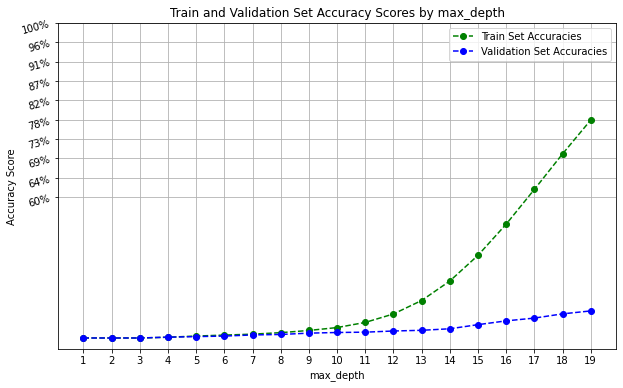

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

# the label/tick locations
x_ticks = np.arange(len(max_depth_values))
# yloc between 0.6-1
y_ticks = np.linspace(.6, 1.0, 10)
y_labels = [f"{val*100:.0f}%" for val in y_ticks]

ax.plot(train_set_accuracies, "go--", label = "Train Set Accuracies")
ax.plot(val_set_accuracies, "bo--", label = "Validation Set Accuracies")

ax.set_ylabel("Accuracy Score")
ax.set_xlabel("max_depth")
ax.set_title("Train and Validation Set Accuracy Scores by max_depth")
ax.set_xticks(x_ticks)
ax.set_xticklabels(max_depth_values)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.legend()

plt.yticks(rotation = 15)
plt.grid()
plt.show()

Max depth = 19 gives best result in validation set

## Minimum sample split

In [ ]:
min_samples_split_values = np.arange(2, 8)

In [ ]:
train_set_accuracies = []
val_set_accuracies = []

for samples_split in min_samples_split_values:
  model = DecisionTreeClassifier(criterion="entropy", min_samples_split=samples_split)
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  train_set_accuracies.append(accuracy_score(y_train, train_preds))
  val_set_accuracies.append(accuracy_score(y_val, val_preds))

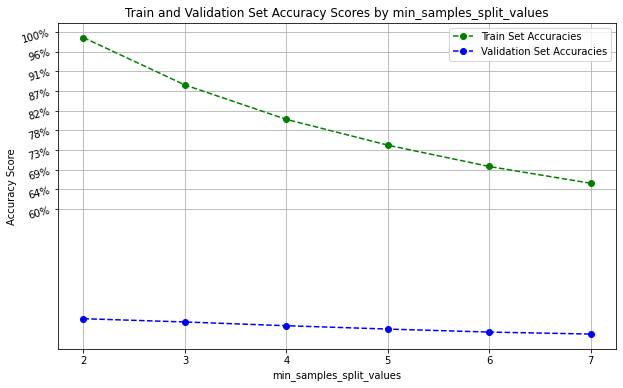

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

# the label/tick locations
x_ticks = np.arange(len(min_samples_split_values))
# yloc between 0.6-1
y_ticks = np.linspace(.6, 1.0, 10)
y_labels = [f"{val*100:.0f}%" for val in y_ticks]

ax.plot(train_set_accuracies, "go--", label = "Train Set Accuracies")
ax.plot(val_set_accuracies, "bo--", label = "Validation Set Accuracies")

ax.set_ylabel("Accuracy Score")
ax.set_xlabel("min_samples_split_values")
ax.set_title("Train and Validation Set Accuracy Scores by min_samples_split_values")
ax.set_xticks(x_ticks)
ax.set_xticklabels(min_samples_split_values)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.legend()

plt.yticks(rotation = 15)
plt.grid()
plt.show()

min sample split = 2 gives best result in validation set.

## Minimum sample leaf

In [ ]:
min_samples_leaf_values = np.arange(1, 5)

In [ ]:
train_set_accuracies = []
val_set_accuracies = []

for leaf in min_samples_leaf_values:
  model = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=leaf)
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  train_set_accuracies.append(accuracy_score(y_train, train_preds))
  val_set_accuracies.append(accuracy_score(y_val, val_preds))

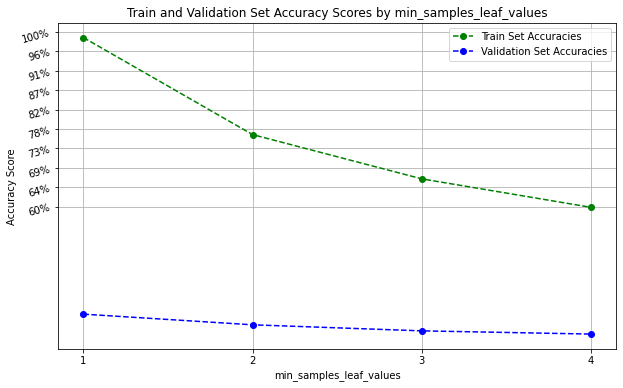

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

# the label/tick locations
x_ticks = np.arange(len(min_samples_leaf_values))
# yloc between 0.6-1
y_ticks = np.linspace(.6, 1.0, 10)
y_labels = [f"{val*100:.0f}%" for val in y_ticks]

ax.plot(train_set_accuracies, "go--", label = "Train Set Accuracies")
ax.plot(val_set_accuracies, "bo--", label = "Validation Set Accuracies")

ax.set_ylabel("Accuracy Score")
ax.set_xlabel("min_samples_leaf_values")
ax.set_title("Train and Validation Set Accuracy Scores by min_samples_leaf_values")
ax.set_xticks(x_ticks)
ax.set_xticklabels(min_samples_leaf_values)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.legend()

plt.yticks(rotation = 15)
plt.grid()
plt.show()

Min samples leaf = 1 gives the best result in our validation set.

## MAX depth = 8 the results of Decision tree and Random forest

In [ ]:
#Decision Tree Training
model_dt = tree.DecisionTreeClassifier(random_state=42, max_depth=8) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

model_rf = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=8, min_samples_split=2)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

dt_predictions = model_dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)

rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:"+str(dt_acc))
print("Random Forest Accuracy:"+str(rf_acc))

Decision Tree Accuracy:0.28512642311737
Random Forest Accuracy:0.2809656622925335


## MAX depth = 19 the results of Decision tree and Random forest

In [ ]:
#Decision Tree Training
model_dt = tree.DecisionTreeClassifier(random_state=42, max_depth=19) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

model_rf = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=19, min_samples_split=2)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=19, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

dt_predictions = model_dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)

rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:"+str(dt_acc))
print("Random Forest Accuracy:"+str(rf_acc))

Decision Tree Accuracy:0.29120753509213115
Random Forest Accuracy:0.3607059576608294


Max depth = 19 give better accuracies in both decision tree and random forest models.

## Feature Importance

In [ ]:
feature_list = list(range(m_new.shape[1]))

# Get importance list from model
importances = list(model_rf.feature_importances_)

# Create list of tuples by combining(zip) feature list and and importance list 
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort features by importance
feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)

# Print top 5 features 
for pair in feature_importances[:5]:
  print("Variable: {:2}   Importance: {}".format(*pair))

Variable: 13   Importance: 0.14
Variable:  0   Importance: 0.13
Variable:  3   Importance: 0.08
Variable:  7   Importance: 0.08
Variable:  9   Importance: 0.08


Text(0.5, 1.0, 'Feature Importances')

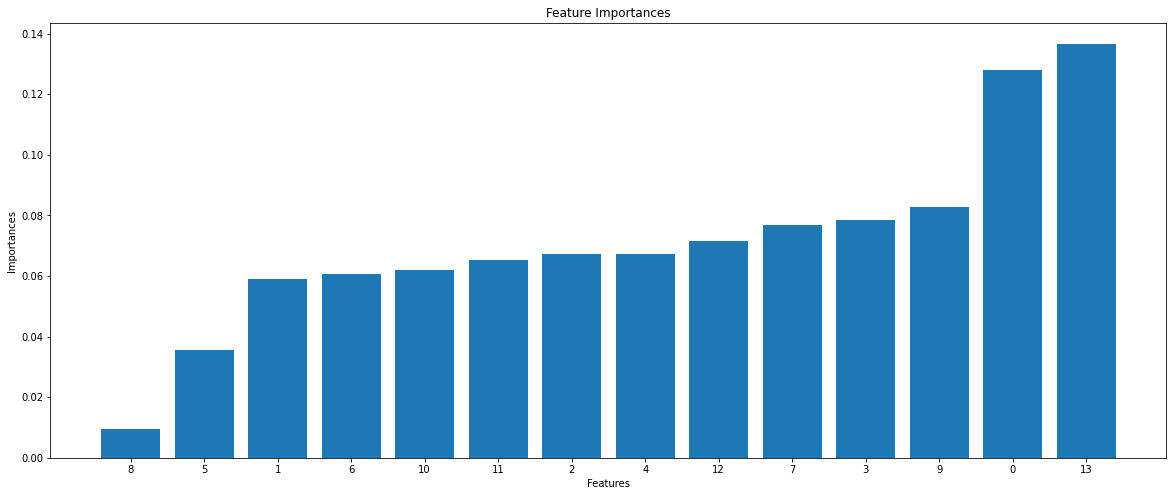

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
index=np.argsort(importances)
arr_sorted=[]
for i in index:
  arr_sorted.append(importances[i])

x=np.arange(0,len(importances))
ax.set_xticks(x)
ax.set_xticklabels(index)
ax.bar(x,arr_sorted)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature Importances")


In [ ]:
m_new.head(0)

,acousticness,artists,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,duration,genres


The most important features are genres and acousticness.

## Effect of Dropping Genre feature

In [ ]:
m1_new = merged.drop(["name", "id", "explicit", "release_date", "year", "genres", "Year_Interval"], axis=1)

encoder = OrdinalEncoder()
m1_new["artists"] = encoder.fit_transform(m_new[["artists"]])
#m1_new["genres"] = encoder.fit_transform(m_new[["genres"]])


y= m1_new["popularity"]
X= m1_new.drop(["popularity"], axis=1)

# 80% training, 20% for validation and testing
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state=0, test_size=0.20)
# divide the remaining part into two
# at the end, you get 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)

model_dt = tree.DecisionTreeClassifier(random_state=42, max_depth=19) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

model_rf = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=19, min_samples_split=2)
model_rf.fit(X_train, y_train)


dt_predictions = model_dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)

rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:"+str(dt_acc))
print("Random Forest Accuracy:"+str(rf_acc))

Decision Tree Accuracy:0.32623108225504094
Random Forest Accuracy:0.39934159389145446


After dropping Genre feature, Decision tree and Random forest accuracies are increased.

# Song Recommendation System

## Normalizing numerical values and creataing example input list(ex)

In [ ]:
from collections import Counter
from scipy.spatial import distance

ad = merged.drop(["explicit", "id", "release_date", "genres", "year", "mode", "key", "artists", "name","Year_Interval"], axis=1)

ad = (ad - ad.min()) / (ad.max() - ad.min())

ex = ad[0:100]

ex

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,duration
0,0.994980,0.605263,0.2240,0.000522,0.379,0.741868,0.12,0.096395,0.615900,0.634,0.030564
1,0.996988,0.654858,0.1860,0.000018,0.519,0.750168,0.04,0.179197,0.400810,0.689,0.029814
2,0.995984,0.791498,0.0573,0.000002,0.176,0.744609,0.05,0.060968,0.351743,0.487,0.035627
3,0.998996,0.487854,0.2290,0.000061,0.549,0.742009,0.04,0.083625,0.317165,0.461,0.036190
4,0.995984,0.580972,0.1380,0.000492,0.233,0.717704,0.01,0.112255,0.650585,0.764,0.034690
...,...,...,...,...,...,...,...,...,...,...,...
95,0.998996,0.505061,0.4900,0.934000,0.147,0.677394,0.00,0.126674,0.501932,0.800,0.032627
96,0.998996,0.338057,0.3110,0.970000,0.147,0.691238,0.00,0.077034,0.691713,0.572,0.035252
97,1.000000,0.598178,0.5380,0.900000,0.316,0.791622,0.00,0.074562,0.474015,0.680,0.032440
98,1.000000,0.580972,0.5240,0.947000,0.130,0.781066,0.00,0.108136,0.524038,0.440,0.028502


ex is a spotify song list such as Rana's playlist. There are 100 songs. We actually do not know Rana's playlist, for simplicity we assign first 100 songs in the main data to Rana's playlist (ex).

In [ ]:
ex = ex.mean()
ex = ex.values
ex
ad = ad.values
ex

array([0.96115798, 0.52078947, 0.342065  , 0.83263813, 0.247439  ,
       0.7150646 , 0.0063    , 0.09695675, 0.5137633 , 0.614892  ,
       0.03235702])

Then, we take the means of each numerical feature and create a vector which includes means of 100 songs' numerical features. This vector represent a point in 11 dimensional space.

In [ ]:
from collections import Counter
from scipy.spatial import distance

distances = []

  # iterate over the data
for instance in ad:
    # calculate the distance
    # the locations for an instance are stored
    # in the first two entries; x, y
  dist = distance.euclidean(ex, instance)
    # append it to the distances list
    # alongside the label of that instance
    # which resides at the last index
  distances.append((dist))

In [ ]:
distances = pd.DataFrame(distances)
distances

,0
0,0.869708
1,0.915426
2,0.949036
3,0.929415
4,0.883384
...,...
218698,0.663598
218699,0.736469
218700,0.673614
218701,0.663598


We calculate distances of each songs in our main data with Rana's playlist vector.

In [ ]:
merged["distance"] = distances
merged.head()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration,genres,Year_Interval,distance
0,0.991,Mamie Smith,0.598,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,168,"['harlem renaissance', 'traditional blues']",1920s,0.869708
1,0.993,Mamie Smith,0.647,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,164,"['harlem renaissance', 'traditional blues']",1920s,0.915426
2,0.992,Mamie Smith,0.782,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.487,1920,195,"['harlem renaissance', 'traditional blues']",1920s,0.949036
3,0.995,Mamie Smith,0.482,0.2290,0,0lqEx4vktZP1y9hnwfF27Y,0.000061,7,0.549,-12.619,1,Kansas City Man Blues - 78rpm Version,4,1920,0.0812,77.232,0.461,1920,198,"['harlem renaissance', 'traditional blues']",1920s,0.929415
4,0.992,Mamie Smith,0.574,0.1380,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.233,-14.171,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,1920,0.1090,158.422,0.764,1920,190,"['harlem renaissance', 'traditional blues']",1920s,0.883384


## Recomended 5 songs

In [ ]:
m_sorted = merged.sort_values("distance",ascending=True)
m_sorted.head()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration,genres,Year_Interval,distance
44511,0.962,Asha Bhosle,0.543,0.330,0,2rVl9Q2o20EJ3Kwvdpkr7Q,0.803,1,0.204,-13.179,1,Gavoo Ya Gavoo Ya,0,1952-12-31,0.1160,125.190,0.653,1952,197,"['chutney', 'classic bollywood', 'desi pop', '...",1950s,0.078135
402,0.996,Francisco Canaro,0.544,0.364,0,6CvTMokkWAZb2AssmMnbWt,0.850,7,0.266,-14.157,1,Suprema - Remasterizado,0,1925-07-12,0.0577,133.778,0.674,1925,149,"['tango', 'vintage tango']",1920s,0.098856
24528,0.955,Charlie Chaplin,0.467,0.380,0,5aiBpkcd0s4xE03GEjfguI,0.861,4,0.197,-13.608,1,A Paris Boulevard,0,1947,0.1470,130.504,0.643,1947,67,['classic soundtrack'],1940s,0.109333
71,0.996,Francisco Canaro,0.467,0.360,0,2EHCmcIdGcn282tF7hkt0P,0.897,2,0.290,-13.877,0,La Garconiere - Remasterizado,0,1924-07-11,0.0516,119.334,0.601,1924,165,"['tango', 'vintage tango']",1920s,0.113454
22766,0.991,ANTONIS NTALGKAS,0.557,0.310,0,1G41AuDat1WGIttMT8I1dk,0.785,5,0.286,-10.683,0,Apo ligo ligo,0,1930-01-01,0.0890,114.891,0.648,1930,184,[],1930s,0.118234


Finally, we sorted songs according to their distance from small to large. Closest 5 songs are our recommendation to Rana.